In [132]:
#Research question: 
#Are the features like company, score, votes, etc., determine the gross(revenue) collection for the movie?

In [427]:
#Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

#matplotlib.rcParams['figure.figsize']= (12,8) 

In [428]:
#Read the dataset
df = pd.read_csv('/Users/nirajkc/Desktop/movies.csv')

In [429]:
#look the top 100 rows
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [430]:
#pd.set_option('display.max_rows', None)

In [431]:
df.shape

(7668, 15)

In [432]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [433]:
#checking null values in each columns
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [434]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [435]:
#Revenue is highly right skewed

In [436]:
#checking null values of budget and gross
df.budget.isnull().sum()

2171

In [437]:
#mean of all the budgets
#we can also use describe() to see the  stastistics of numeric variables
#df.describe()
mean_budget = df.budget.mean()
mean_budget = round(mean_budget,2)

In [438]:
#filling null values of budget with its mean value
df.budget = df.budget.fillna(mean_budget)

In [439]:
#again checking null value of budget after replacing with its mean value
df.budget.isnull().sum()

0

In [440]:
#converting float data type to int
df['budget'] = df['budget'].apply(int)

In [441]:
#dataype of budget
df.budget.dtypes

dtype('int64')

In [442]:
#data type of gross and int
df.gross = df.gross.fillna(df.gross.mean())
df.gross= df.gross.apply(int)

In [443]:
df.gross.isnull().sum()

0

In [444]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [445]:
#Change columns name, so that it is more readable
df.rename(columns={"name":"Title", "gross":"Revenue", "score":"Rating"}, inplace=True)

In [446]:
#groupby
df.groupby("director")[["Rating"]].mean().head()

,Rating
director,
A.R. Murugadoss,7.300000
Aamir Khan,8.400000
Aaron Blaise,6.800000
Aaron Norris,4.983333
Aaron Seltzer,2.800000


In [447]:
#sorting (Top 10 director with heighest meidan revenue collections)
df1= df.groupby('director')[["Revenue","Rating"]].median().sort_values(["Revenue"], ascending = False).head(10)
df1.index

Index(['Chris Buck', 'Anthony Russo', 'Kyle Balda', 'Josh Cooley',
       'Lee Unkrich', 'David Yates', 'Peter Jackson', 'George Lucas',
       'David Leitch', 'Robert Stromberg'],
      dtype='object', name='director')

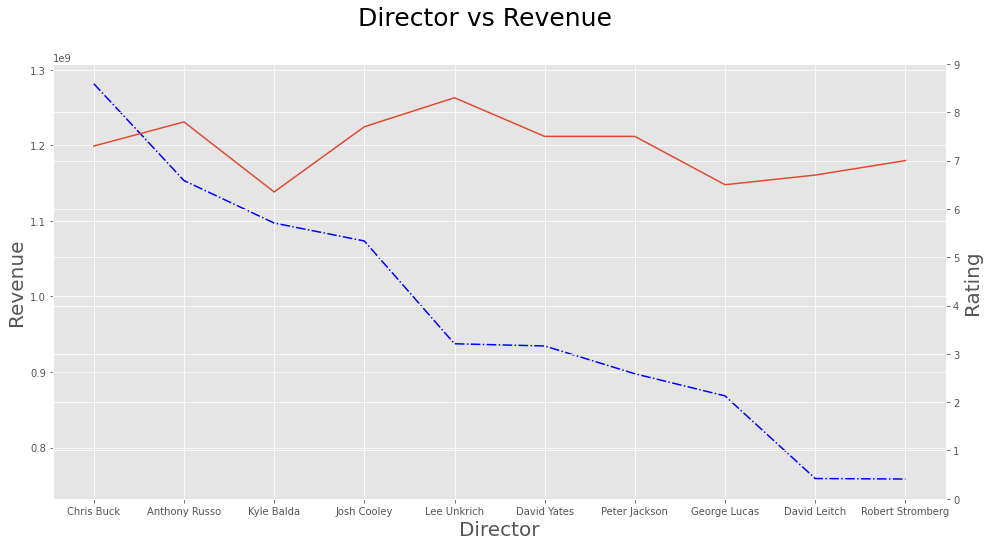

In [448]:
#Line plots of director with heighest grossing and their respectivr ratings
fig, ax1 = plt.subplots(figsize=(16,8))
ax2=ax1.twinx()


ax1.plot( df1.index, df1.Revenue, "-.", color="blue",)
ax2.plot(df1.index, df1.Rating)

fig.suptitle("Director vs Revenue", fontsize=25)

ax1.set_xlabel("Director",fontsize=20)
ax1.set_ylabel("Revenue",fontsize=20)

ax2.set_ylim(0,9)
ax2.set_ylabel("Rating",fontsize=20)
plt.show()


In [449]:

#create user define function rating_group
def rating_group(Rating):
    if Rating >= 7.5:
        return"Good"
    elif Rating >= 6.0:
        return "Average"
    else:
        return "Bad"
    
#add new column Rating category
df["Rating_category"]= df["Rating"].apply(rating_group)
   

In [450]:
#We will create one more column Revenue_millions from Revenue, so that it is more readable.
df['Revenue_Millions']= df["Revenue"]/1000000

In [451]:
df.head()

,Title,rating,genre,year,released,Rating,votes,director,writer,star,country,budget,Revenue,company,runtime,Rating_category,Revenue_Millions
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,Good,46.998772
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,Bad,58.853106
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,Good,538.375067
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,Good,83.453539
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,Average,39.846344


In [452]:
#Classify movies based on the revenue generated
def collection(Revenue_Millions):
    if Revenue_Millions >= 800:
        return "Blockbuster"
    elif Revenue_Millions >= 500:
        return "Hit"
    elif Revenue_Millions >= 200:
        return "Average"
    else:
        return "Flop"

In [453]:
df["Collection_category"] = df["Revenue_Millions"].apply(collection)

In [454]:
df.head()

,Title,rating,genre,year,released,Rating,votes,director,writer,star,country,budget,Revenue,company,runtime,Rating_category,Revenue_Millions,Collection_category
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,Good,46.998772,Flop
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,Bad,58.853106,Flop
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,Good,538.375067,Hit
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,Good,83.453539,Flop
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,Average,39.846344,Flop


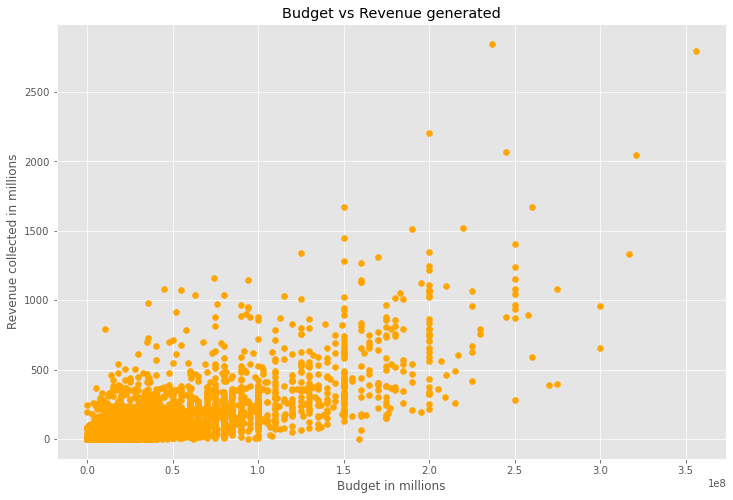

In [455]:
#Compare budget vs Revenue_million by scatterplot
plt.scatter( x = df["budget"], y = df["Revenue_Millions"], color="orange")
plt.title("Budget vs Revenue generated")
plt.xlabel("Budget in millions")
plt.ylabel("Revenue collected in millions")
plt.show()

<AxesSubplot:xlabel='budget', ylabel='Revenue_Millions'>

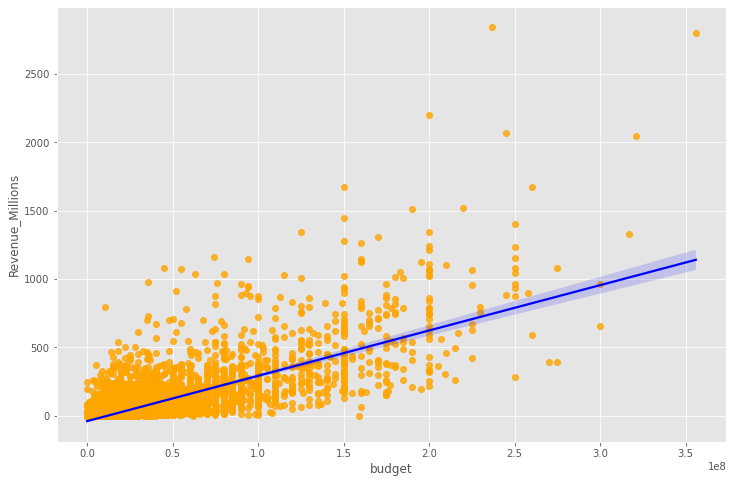

In [456]:
#Plot budget vs Revenue using seaborn
#Regression plot
sns.regplot(x="budget", y="Revenue_Millions", data=df, scatter_kws={"color":"Orange"}, line_kws={"color":"Blue"})

In [457]:
#Seeing correlation coefficent
df.corr()

,year,Rating,votes,budget,Revenue,runtime,Revenue_Millions
year,1.000000,0.097995,0.222945,0.265578,0.252042,0.120811,0.252042
Rating,0.097995,1.000000,0.409182,0.064554,0.182868,0.399451,0.182868
votes,0.222945,0.409182,1.000000,0.421090,0.628713,0.309212,0.628713
budget,0.265578,0.064554,0.421090,1.000000,0.711270,0.265305,0.711270
Revenue,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336,1.000000
runtime,0.120811,0.399451,0.309212,0.265305,0.241336,1.000000,0.241336
Revenue_Millions,0.252042,0.182868,0.628713,0.711270,1.000000,0.241336,1.000000


In [458]:
#It is seen that there is high correlation between Revenue_millions vs budget

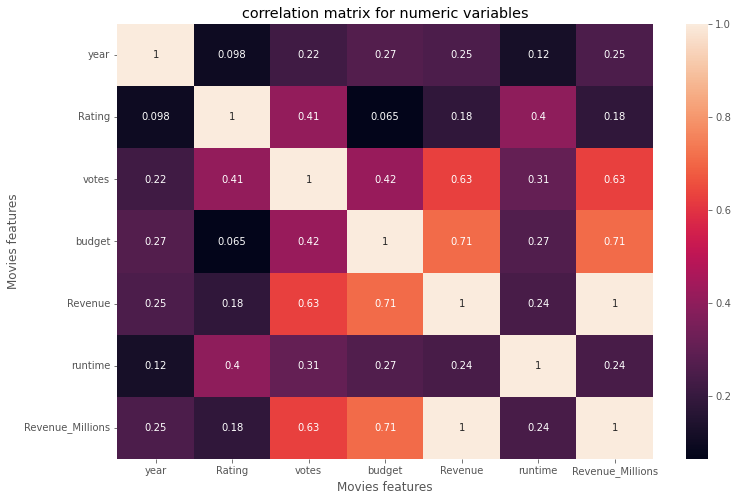

In [459]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation matrix for numeric variables")
plt.xlabel("Movies features")
plt.ylabel("Movies features")
plt.show()

In [460]:
#if we change company and other object data types into numeric(categoric), we can do see the correlation of it
df_num = df

for column in df_num.columns:
    if (df_num[column].dtype=='object'):
        df_num[column]=df_num[column].astype("category")
        df_num[column]=df_num[column].cat.codes
        
df_num.head()

,Title,rating,genre,year,released,Rating,votes,director,writer,star,country,budget,Revenue,company,runtime,Rating_category,Revenue_Millions,Collection_category
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,54,19000000,46998772,2319,146.0,2,46.998772,2
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,55,4500000,58853106,731,104.0,1,58.853106,2
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,55,18000000,538375067,1540,124.0,2,538.375067,3
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,55,3500000,83453539,1812,88.0,2,83.453539,2
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,55,6000000,39846344,1777,98.0,0,39.846344,2


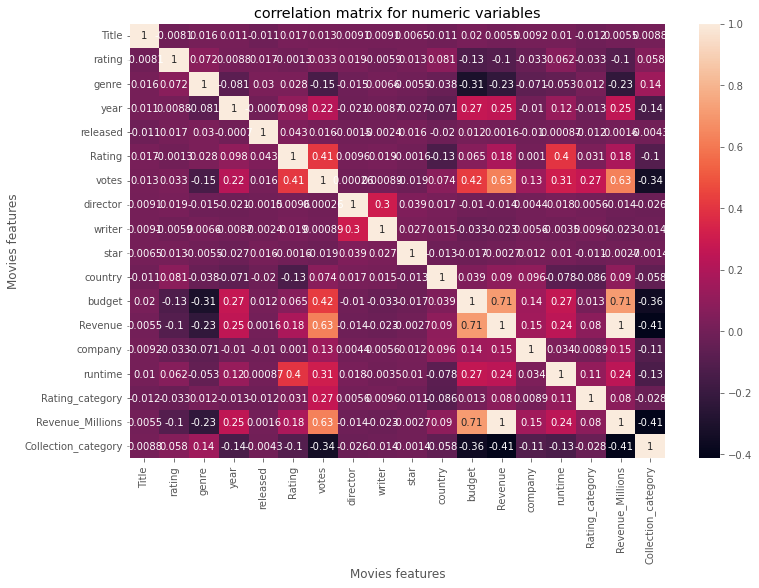

In [461]:
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title("correlation matrix for numeric variables")
plt.xlabel("Movies features")
plt.ylabel("Movies features")
plt.show()

In [462]:
correlation_num = df_num.corr()
correlation_num

,Title,rating,genre,year,released,Rating,votes,director,writer,star,country,budget,Revenue,company,runtime,Rating_category,Revenue_Millions,Collection_category
Title,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020368,0.005466,0.009211,0.010392,-0.012383,0.005466,0.008799
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.126046,-0.102116,-0.032943,0.062145,-0.032828,-0.102116,0.058462
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.310566,-0.230267,-0.071067,-0.052711,0.012074,-0.230267,0.140417
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.265578,0.252042,-0.010431,0.120811,-0.012852,0.252042,-0.142200
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.020427,0.012263,0.001636,-0.010474,0.000868,-0.012291,0.001636,-0.004274
Rating,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.064554,0.182868,0.001030,0.399451,0.031481,0.182868,-0.101996
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.421090,0.628713,0.133204,0.309212,0.266912,0.628713,-0.341890
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,-0.010364,-0.014272,0.004404,0.017624,0.005601,-0.014272,-0.025662
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.033216,-0.023210,0.005646,-0.003511,0.009575,-0.023210,-0.013960
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.016628,-0.002682,0.012442,0.010174,-0.010845,-0.002682,-0.001394


In [463]:
correlation_num = df_num.corr()
correlation_num.unstack()

Title                Title                  1.000000
                     rating                -0.008069
                     genre                  0.016355
                     year                   0.011453
                     released              -0.011311
                     Rating                 0.017097
                     votes                  0.013088
                     director               0.009079
                     writer                 0.009081
                     star                   0.006472
                     country               -0.010737
                     budget                 0.020368
                     Revenue                0.005466
                     company                0.009211
                     runtime                0.010392
                     Rating_category       -0.012383
                     Revenue_Millions       0.005466
                     Collection_category    0.008799
rating               Title                 -0.

In [464]:
correlation_num.unstack().sort_values()

Collection_category  Revenue               -0.413935
Revenue              Collection_category   -0.413935
Revenue_Millions     Collection_category   -0.413935
Collection_category  Revenue_Millions      -0.413935
budget               Collection_category   -0.356572
Collection_category  budget                -0.356572
                     votes                 -0.341890
votes                Collection_category   -0.341890
genre                budget                -0.310566
budget               genre                 -0.310566
Revenue              genre                 -0.230267
genre                Revenue               -0.230267
Revenue_Millions     genre                 -0.230267
genre                Revenue_Millions      -0.230267
                     votes                 -0.145307
votes                genre                 -0.145307
Collection_category  year                  -0.142200
year                 Collection_category   -0.142200
Collection_category  runtime               -0.

In [465]:
pair = correlation_num.unstack().sort_values()
High_corr = pair[(pair) > 0.5]
High_corr

votes                Revenue_Millions       0.628713
Revenue_Millions     votes                  0.628713
Revenue              votes                  0.628713
votes                Revenue                0.628713
Revenue              budget                 0.711270
budget               Revenue                0.711270
                     Revenue_Millions       0.711270
Revenue_Millions     budget                 0.711270
Title                Title                  1.000000
writer               writer                 1.000000
rating               rating                 1.000000
genre                genre                  1.000000
year                 year                   1.000000
released             released               1.000000
Rating               Rating                 1.000000
votes                votes                  1.000000
director             director               1.000000
Revenue_Millions     Revenue_Millions       1.000000
Collection_category  Collection_category    1.

In [466]:
#So, budget and vote are highly correlated with gross(Revenue) generated from the movies.
#where as company, director does not matter too much with the movies revenue collections.